# ¿Qué factores son importantes al momento de vender un automóvil?

El propósito de este proyecto es realizar un análisis sobre cuales son los factores mas importantes a tomar en cuenta al momento de comprar un automóvil. Se dispone de un conjunto de datos obtenido de la empresa Crankshaft, el cual nos ayudará con el propósito del análisis.

## Inicialización

In [4]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

In [5]:
# Carga el archivo de datos en un DataFrame
try:
    cars = pd.read_csv('vehicles_us.csv')
except:
    cars = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [6]:
# imprimimos la información general/resumida sobre el DataFrame
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
cars[(cars['model_year'].isna()) & (cars['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


In [8]:
# imprimimos una muestra de datos

cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


**Conclusión:** 

Una vez realizado un breve análisis en la información general del conjunto de datos, encontramos los siguientes inconvenientes.

1. Valores ausentes en el año del modelo 'model year'.
2. Valores ausentes en el número de cilindros 'cylinders'.
3. Valores ausentes en el recorrido del auto 'odometer'.
4. Valores ausentes en el color del auto 'paint_color'.
5. Valores ausentes en el campo 'is_4wd'

In [9]:
#Calculamos la cantidad de valores ausentes por columna.

cars.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [10]:
#Revisamos si hay duplicados.
cars[cars.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Además se encontró tipos de datos no apropiados en las siguientes columnas:

1. La columna 'Price' es de tipo int, debería ser float.
2. La columna 'model_year' es de tipo float, debería ser int.
3. La columna 'cylinders' es de tipo float, debería ser int.
4. La columna 'is_4wd' es de tipo float, debería ser bool.
5. La columna 'date_posted' es de tipo object, debería ser date.
6. La columna 'price' presenta valores atípicos igual a 1.

    

Luego de observar el cojunto de datos para los valores ausentes vamos a proceder de la siguiente manera.

1. El odometro y el modelo del año son datos definitorios al momento de adquirir un vehiculo, por lo tanto vamos a eliminar los registros en los que ambos datos sean ausentes, ya que la ausencia de esta información no aporta en absoluto a nuestro análisis.

In [11]:
# Cantidad de registros que tienen datos ausentes en 'odometer' y 'model_year'.
number = cars[(cars['odometer'].isna()) & (cars['model_year'].isna())]['model'].count()
#print(number)
percentage = (number/cars.shape[0])*100
print(f'El número de registros a eliminar es {number} y representa el {percentage:.2f} % del conjunto de datos')

El número de registros a eliminar es 549 y representa el 1.07 % del conjunto de datos


2. El numero de cilindros no es un dato relevante, además puede ser por el hecho de que existen vehiculos impulsados por sistemas alternos al de combustión interna. 

3. Los valores ausentes en la columna 'paint_color' será reemplazada por 'other', ya que se puede que están ausentes porque el automovil tiene dos o mas colores o en la paleta de opciones no existía el color correcto.

4. En la columna 'is_4wd' colocaremos valor booleano falso ya que solo existen ambas posibilidades.

5. En la columna 'pice' encontramos valores inapropiados igual a 1. Un vehiculo no puede costar 1 USD. Por lo tanto serán eliminados ya que representa menos del 0,1 % de nuestro conjunto de datos.

In [12]:
cars['price'].value_counts().sort_values(ascending= False).head()

1       798
6995    719
5995    655
4995    624
3500    620
Name: price, dtype: int64

In [13]:
print(cars.query('price == 1')['price'].count())
cars = cars.query('price != 1') 
print(cars.query('price == 1')['price'].count())

798
0


## Tratamiento de valores ausentes

In [14]:
# Realizamos un segmento de datos que excluya a las filas con valor ausente en ambas columnas 'odometer' y 'model_year'.
cars = cars.query('~odometer.isna() or ~model_year.isna()')
print(len(cars.query('odometer.isna() and model_year.isna()')))

0


**Análisis para reemplazar la variable "Odometer"**

In [15]:
cars.pivot_table(index= 'condition', values= 'odometer', aggfunc= ['mean', 'median'])

,mean,median
,odometer,odometer
condition,,
excellent,108798.144985,106000.0
fair,183487.740632,182000.0
good,129905.523270,129000.0
like new,79763.415435,73108.0
new,44077.926230,7447.5
salvage,140919.989796,142673.5


**Conclusión**

La media con la mediana tienen casi los mismos valores a excepción de la condición new, al parecer tiene valores 0 los cuales desplazan la media, ya que 0 kilómetros definen mejor una condición de nuevo, en este caso se usará la media.

In [16]:
#Definimos una función para reemplazar los datos ausentes
def fillna_by_other_column(df, target_column, column_to_replace, agg = "mean"):
    grouped = df.groupby(column_to_replace).agg({target_column: ["mean","median"]})

    for index in grouped.index:
        df.loc[df[target_column].isna() & (df[column_to_replace] == index),  target_column] = grouped.loc[index,(target_column, agg)]
        
    return df

In [17]:
# Reemplazamos los valores nulos en la varible odometer 
replaced_odo = cars['odometer'].isna().sum()
cars = fillna_by_other_column(cars, 'odometer', 'condition')
print(f'Se reemplazaron {replaced_odo} valores "odometer" por la media según la variable "condition", esto representa el {(replaced_odo/cars.shape[0])*100:.2f} % del conjunto de datos')

Se reemplazaron 7229 valores "odometer" por la media según la variable "condition", esto representa el 14.40 % del conjunto de datos


In [18]:
cars['odometer'].isna().sum()

0

**Analisis para reemplazar la variable "Cylinder"**

In [19]:
cars.pivot_table(index= 'model', values= 'cylinders', aggfunc= ['mean', 'median'])

,mean,median
,cylinders,cylinders
model,,
acura tl,5.971429,6.0
bmw x5,6.395161,6.0
buick enclave,6.000000,6.0
cadillac escalade,7.986159,8.0
chevrolet camaro,6.551084,6.0
...,...,...
toyota sienna,5.951049,6.0
toyota tacoma,5.339806,6.0


**Conclusión**

En este caso ya que la cantidad de cilindros es un valor entero, se usará la mediana del número de cilindros por modelo.

In [20]:
# Reemplazamos los valores nulos en la varible odometer 
replaced_cyl = cars['cylinders'].isna().sum()
cars = fillna_by_other_column(cars, 'cylinders', 'model', 'median')
print(f'Se reemplazaron {replaced_cyl} valores "odometer" por la mediana según la variable "model", esto representa el {(replaced_cyl/cars.shape[0])*100:.2f} % del conjunto de datos')

Se reemplazaron 5131 valores "odometer" por la mediana según la variable "model", esto representa el 10.22 % del conjunto de datos


In [21]:
cars['cylinders'].value_counts()

8.0     17328
6.0     17038
4.0     15241
5.0       293
10.0      252
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [22]:
cars['cylinders'].isna().sum()

0

In [23]:
# Reemplazamos los valores nulos en la varible model_year por '-1' para no borrarlos ya que otros varibles de estos registros son importantes.
print(cars['model_year'].isna().sum())
cars.loc[cars['model_year'].isna(), 'model_year'] = -1
null_model = len(cars.loc[cars['model_year'] == -1])
print(f'Se transformaron {null_model} valores nulos a -1 en la variable "model_year", esto representa el {(null_model/cars.shape[0])*100:.2f} % del conjunto de datos')

3027
Se transformaron 3027 valores nulos a -1 en la variable "model_year", esto representa el 6.03 % del conjunto de datos


In [24]:
# Reemplazamos los valores nulos en la varible cylinders por '-1' para no borrarlos ya que otros varibles de estos registros son importantes.
print(cars['cylinders'].isna().sum())
cars.loc[cars['cylinders'].isna(), 'cylinders'] = -1
null_cylinder = len(cars.loc[cars['cylinders'] == -1])
print(f'Se transformaron {null_cylinder} valores nulos a -1 en la variable "cylinders", esto representa el {(null_cylinder/cars.shape[0])*100:.2f} % del conjunto de datos')

0
Se transformaron 0 valores nulos a -1 en la variable "cylinders", esto representa el 0.00 % del conjunto de datos


In [25]:
# Reemplazamos los valores ausentes en la columna 'paint_color' por 'other'.
print(cars['paint_color'].isna().sum())
cars.loc[cars['paint_color'].isna(), 'paint_color'] = 'other'
print(cars.query('paint_color == "other"')['paint_color'].count())

9020
9020


In [26]:
# Reemplazamos los valores ausentes por 0, en este caso equivalente a falso.

print(cars['is_4wd'].isna().sum())
cars.loc[cars['is_4wd'].isna(), 'is_4wd'] = 0
print(len(cars.query('is_4wd == 0')))

25536
25536


## Corregir los tipos de datos

In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50187 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50187 non-null  int64  
 1   model_year    50187 non-null  float64
 2   model         50187 non-null  object 
 3   condition     50187 non-null  object 
 4   cylinders     50187 non-null  float64
 5   fuel          50187 non-null  object 
 6   odometer      50187 non-null  float64
 7   transmission  50187 non-null  object 
 8   type          50187 non-null  object 
 9   paint_color   50187 non-null  object 
 10  is_4wd        50187 non-null  float64
 11  date_posted   50187 non-null  object 
 12  days_listed   50187 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


In [28]:
# Corregimos todos los tipos de dato mencionados anteriormente.
cars['price'] = cars['price'].astype('float')

In [29]:
cars['model_year'].fillna(-1, inplace= True)
cars['model_year'] = cars['model_year'].astype('int', errors = 'ignore')


In [30]:
cars['cylinders'] = cars['cylinders'].astype('int', errors = 'ignore')

In [31]:
cars['is_4wd'].fillna(0, inplace = True)
cars['is_4wd'] = cars['is_4wd'] == 1

In [32]:
cars['date_posted'] = pd.to_datetime(cars['date_posted'], format= '%Y-%m-%d')

In [33]:
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19
1,25500.0,-1,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79
3,1500.0,2003,ford f-150,fair,8,gas,183487.740632,automatic,pickup,other,False,2019-03-22,9
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28


## Enriquecer datos

In [34]:
# Agregamos Día de la semana, mes y año en el que el anuncio se colocó.
cars['weekday_posted'] = cars['date_posted'].dt.weekday
cars['month_posted'] = cars['date_posted'].dt.month
cars['year_posted'] = cars['date_posted'].dt.year


In [35]:
# Agregamos los años del vehículo cuando el anuncio se colocó

cars['years'] = cars['date_posted'].dt.year - cars['model_year']
cars.loc[cars['years'] > 100, 'years'] = -1
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,years
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7
1,25500.0,-1,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,-1
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6
3,1500.0,2003,ford f-150,fair,8,gas,183487.740632,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2


In [36]:
# Agregamos el millaje promedio del vehículo por año
temp = cars.query('model_year > -1')[['odometer','years']]
temp['mean_odometer'] = temp['odometer'] / temp['years']
cars['mean_odometer'] = temp['mean_odometer']
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,years,mean_odometer
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500.0,-1,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,-1,NaN
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500.0,2003,ford f-150,fair,8,gas,183487.740632,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16,11467.983789
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000


In [37]:
print(cars['condition'].unique())

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


In [38]:
# Definimos una fucnción para reemplazar el nombre de la variable categórica 'condition' por valores numéricos.
def replace_con(row):
    
    if row == 'new':
        return 5
    elif row == 'like new':
        return 4
    elif row == 'excellent':
        return 3
    elif row == 'good':
        return 2
    elif row == 'fair':
        return 1
    elif row == 'salvage':
        return 0
    else:
        return float('Nan')

cars['condition'] = cars['condition'].apply(replace_con)
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,years,mean_odometer
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500.0,-1,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,-1,NaN
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500.0,2003,ford f-150,1,8,gas,183487.740632,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16,11467.983789
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000


## Comprobar datos limpios

In [39]:
# imprimimos la información general/resumida sobre el DataFrame

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50187 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           50187 non-null  float64       
 1   model_year      50187 non-null  int32         
 2   model           50187 non-null  object        
 3   condition       50187 non-null  int64         
 4   cylinders       50187 non-null  int32         
 5   fuel            50187 non-null  object        
 6   odometer        50187 non-null  float64       
 7   transmission    50187 non-null  object        
 8   type            50187 non-null  object        
 9   paint_color     50187 non-null  object        
 10  is_4wd          50187 non-null  bool          
 11  date_posted     50187 non-null  datetime64[ns]
 12  days_listed     50187 non-null  int64         
 13  weekday_posted  50187 non-null  int64         
 14  month_posted    50187 non-null  int64         
 15  ye

In [40]:
# imprimimos una muestra de datos
cars.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,years,mean_odometer
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500.0,-1,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,-1,NaN
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500.0,2003,ford f-150,1,8,gas,183487.740632,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16,11467.983789
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000


## Estudio parámetros principales

Vamos a realizar un análisis específico de las variables mas importantes realizando una visualización de su distribución.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Definimos la variable cars_cleaned para segmentar nuestro conjunto de datos y eliminar valores ausentes.

In [41]:
cars_cleaned = cars.query('model_year > -1')

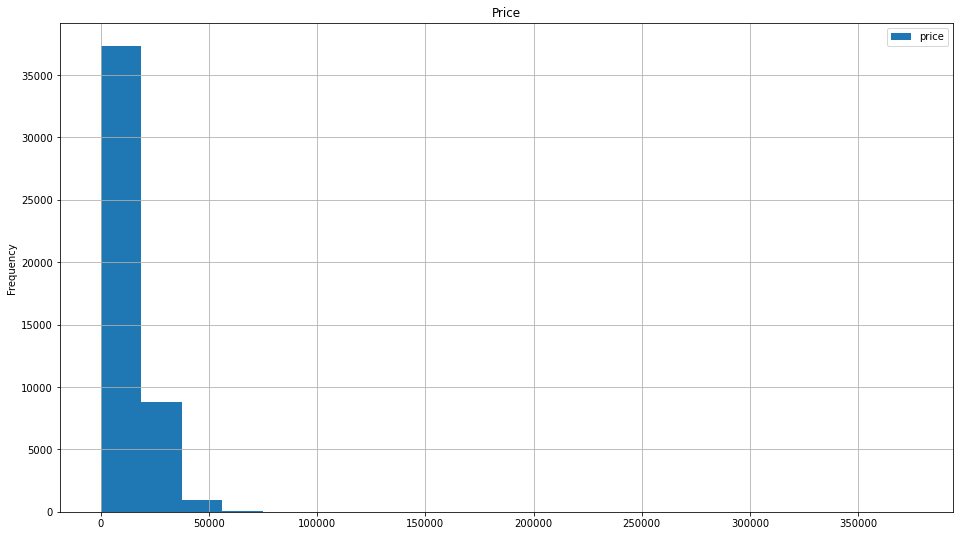

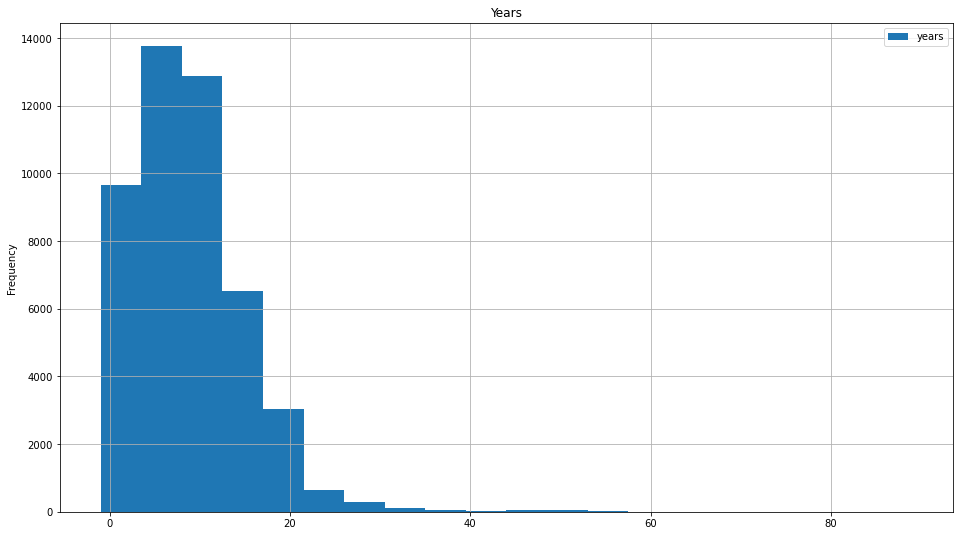

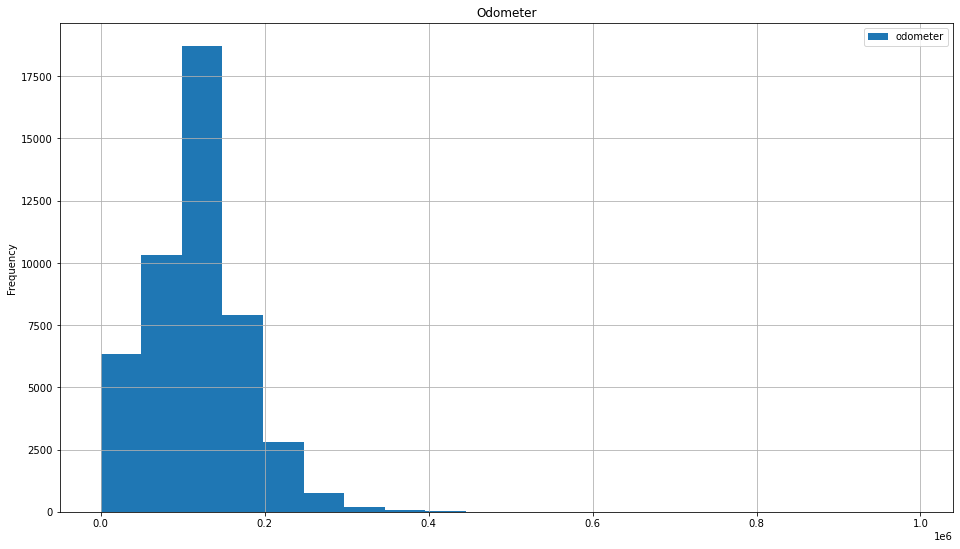

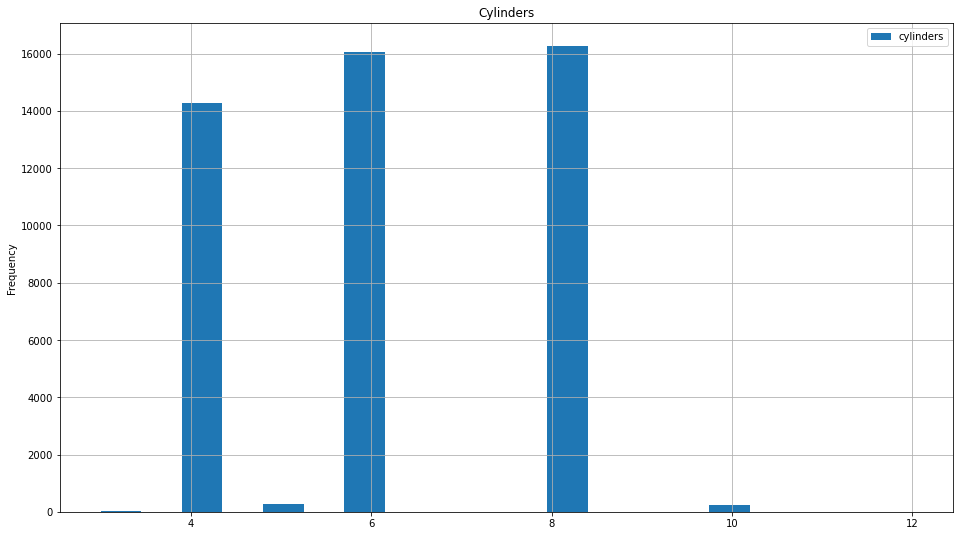

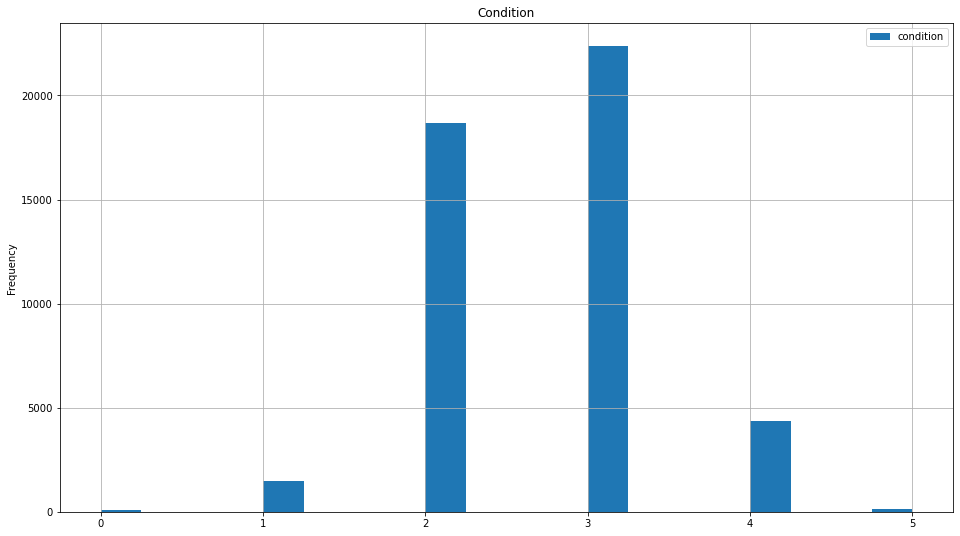

In [42]:
# Desplegamos los histogramas de las variables a estudiar realizando un segmento para eliminar los datos ausentes.


columns = ['price', 'years', 'odometer', 'cylinders', 'condition']

for column in columns:
    
    cars_cleaned.plot(kind= 'hist', y= column, grid= True, bins= 20, title= column.title(), figsize= (16, 9))
    





## Estudiar y tratar valores atípicos

Para identificar los valores atípicos vamos a desplegar un gráfico de cajas para cada columna a estudiar.

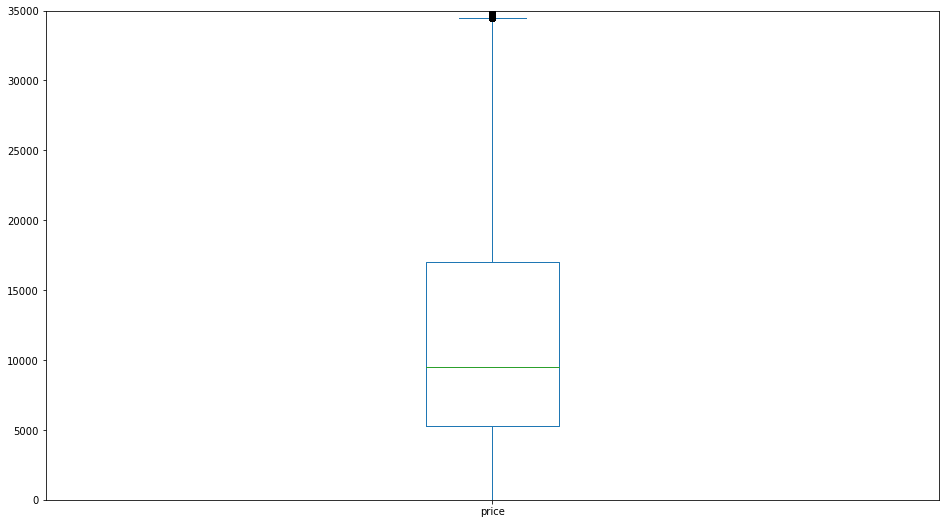

In [43]:
cars_cleaned.plot(kind= 'box', y='price', figsize= (16, 9))
plt.ylim(0,35000)
plt.show()

**conclusiones:**

El límite superior para la columna 'price' se definirá en 35000. No se define límite inferior ya que no se encontraron valores atípicos.


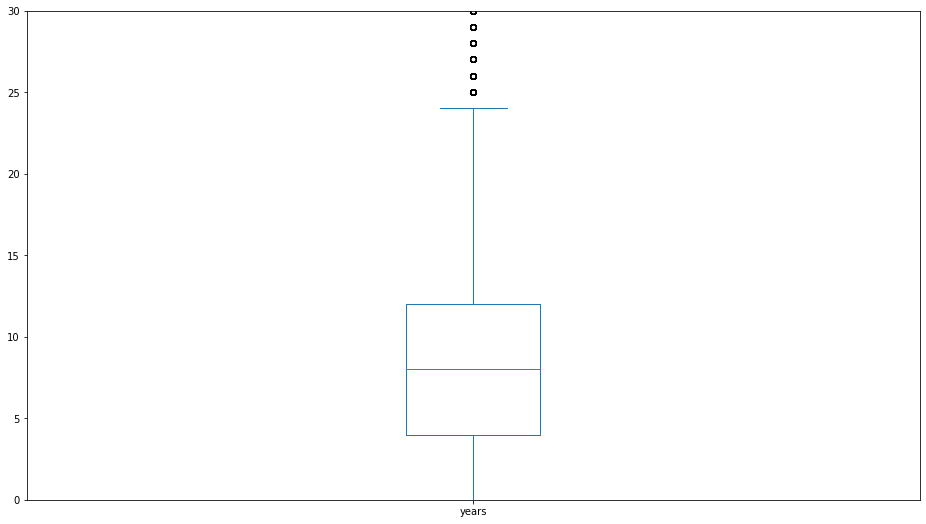

In [44]:
cars_cleaned.plot(kind= 'box', y='years',figsize= (16, 9))
plt.ylim(0,30)
plt.show()

**conclusiones:**

El límite superior para la columna 'years' se definirá en 25. No se define límite inferior ya que no se encontraron valores atípicos.

In [45]:
cars_cleaned['odometer'].value_counts().sort_index().head(100)

0.0      171
1.0       16
2.0        2
3.0        1
5.0        9
        ... 
132.0      5
133.0      2
134.0      4
135.0      1
136.0      6
Name: odometer, Length: 100, dtype: int64

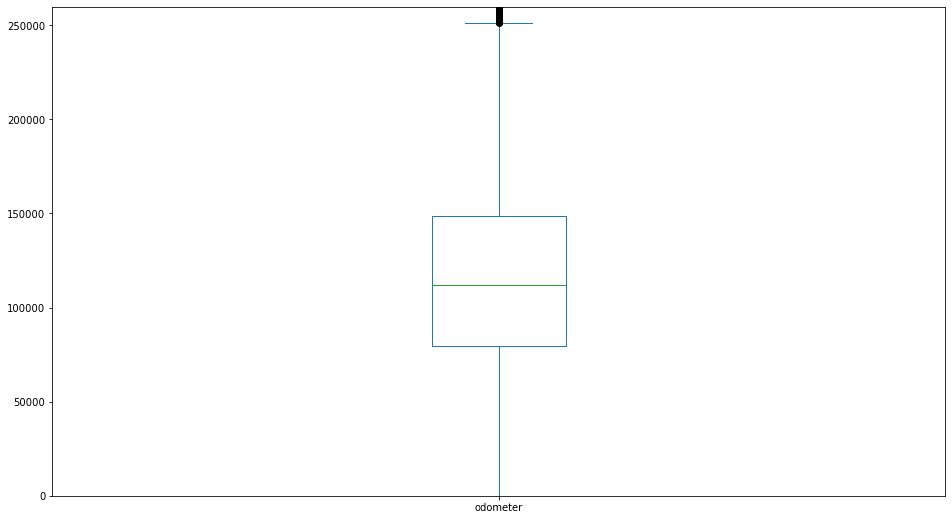

In [46]:
cars_cleaned.plot(kind= 'box', y='odometer', figsize= (16, 9))
plt.ylim(-100,260000)
plt.show()

**conclusiones:**

El límite superior para la columna 'odometer' se definirá en 260000. No se define límite inferior ya que no se encontraron valores atípicos.

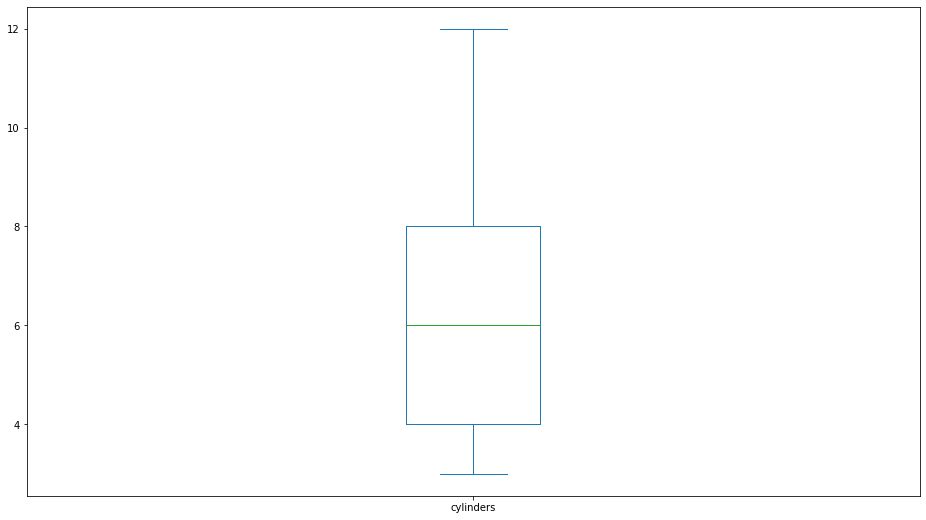

In [47]:
cars_cleaned.plot(kind= 'box', y='cylinders',figsize= (16, 9))
plt.show()

**conclusiones:**

No se define límite superior para la columna 'cylinders'. No se define límite inferior ya que no se encontraron valores atípicos.

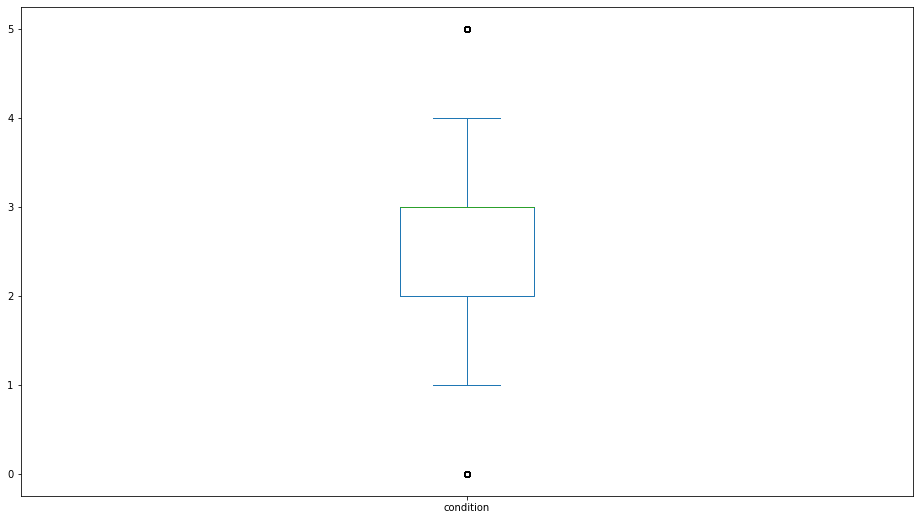

In [48]:
cars_cleaned.plot(kind= 'box', y='condition',figsize= (16, 9))

plt.show()

**conclusiones:**

No se define límite superior para la columna 'condition'. No se define límite inferior ya que no se encontraron valores atípicos.

In [49]:
# Determina los límites inferiores para valores atípicos
lim_inf_price = 3000
# Para la columna years no se añadirá un límite inferior.
# Para la columna odometer no se añadirá un límite inferior.
# Para la columna cylinders no se añadirá un límite inferior.
# Para la columna cond no se añadirá un límite inferior.


Determinamos los limites superiores para cada columna.

In [50]:
# Determinamos los límites superiores para valores atípicos
lim_sup_price = 40000
lim_sup_years = 25
lim_sup_odometer = 30000
# No se define límite superior para la columna cylinders
# Para la columna condition no se añadirá un límite superior.

In [51]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
cond_1 = f'price < {lim_sup_price}'
cond_2 = f'years < {lim_sup_years}'
cond_3 = f'odometer < {lim_sup_odometer}'
cond_4 = f'price > {lim_inf_price}'
query = cond_1 + ' and ' + cond_2 +  ' and ' + cond_3 + ' and ' + cond_4
good_cars = cars.query(query)

good_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,years,mean_odometer
13,16500.0,2018,hyundai sonata,3,4,gas,22104.0,automatic,sedan,silver,False,2019-01-14,29,0,1,2019,1,22104.0
64,15999.0,2017,chevrolet cruze,2,4,gas,17498.0,automatic,sedan,black,False,2018-11-07,54,2,11,2018,1,17498.0
71,23300.0,2018,nissan frontier crew cab sv,2,6,gas,27493.0,other,pickup,other,True,2018-10-13,36,5,10,2018,0,inf
78,23800.0,2019,nissan frontier crew cab sv,2,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,3,2,2019,0,inf
96,24600.0,2013,ford mustang gt coupe 2d,2,8,gas,22474.0,other,coupe,white,False,2018-10-28,22,6,10,2018,5,4494.8


## Estudiar parámetros principales sin valores atípicos

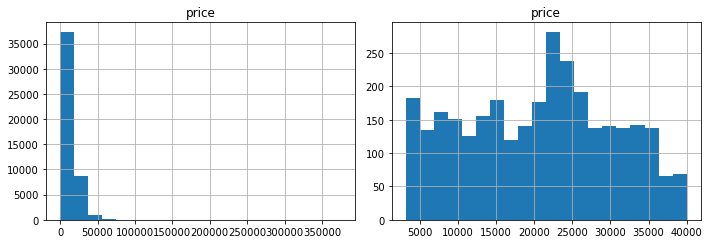

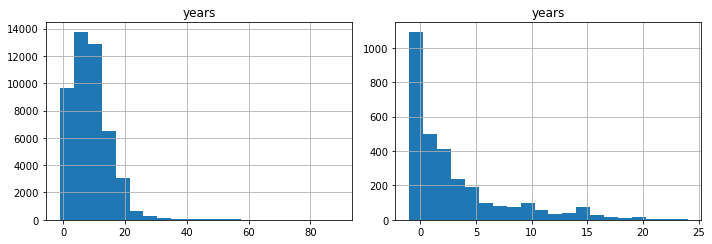

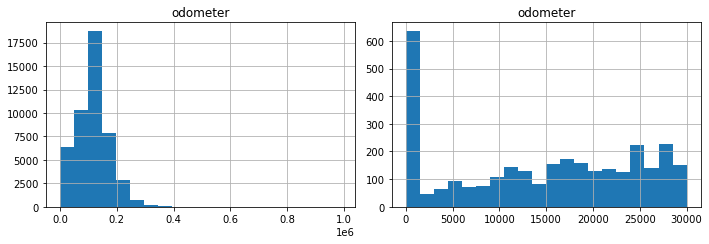

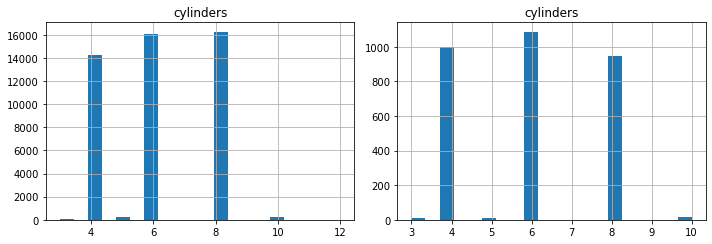

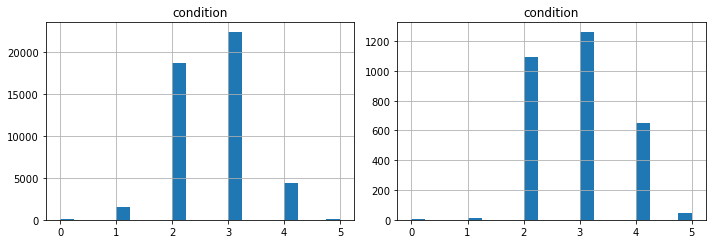

In [52]:
# Con la ayuda de un for desplegamos histogramas de nuestros datos segmentados y nuestro conjunto de datos original.
for column in columns:
    plt.rcParams["figure.figsize"] = [10, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig, axes = plt.subplots(1, 2)

    cars_cleaned.hist(column, ax=axes[0], bins= 20)
    good_cars.hist(column, ax=axes[1], bins= 20)

    plt.show()



**Conclusiones**

1. Precio: 
    - Una vez analizado el segmento de datos sin valores atípicos podemos observar una elevadaa frecuencia en autos de 20000 a 25000 USD.

2. Cantidad de años del vehiculo al momento de elistarlo:
    - Tenemos una tendencia elevada en autos con menos de un año.
    
3. Kilometraje: 
    - Al igual que en la cantidad de años tenemos una concentración de autos con bajo kilometraje, entre 0 a 5000.
    
4. Número de cilindros:
    - En el caso de los cilindros tenemos que la gran mayoría son vehículos con 4, 6 y 8 cilindros.
    
5. Condición:
    - Al igual que en el número de cilindros, a pesar de segmentar los datos hay una fuerte tendencia en ambos gráficos en la condción 3 y 2, exelente y bien respectivamente. 

## Periodo de colocación de los anuncios

Realizamos un análisis de cuantos días estuvieron los autos publicados en la plataforma, comparando su media y mediana con la intención de encontrar periodos en los que aumenta la venta de automóviles.

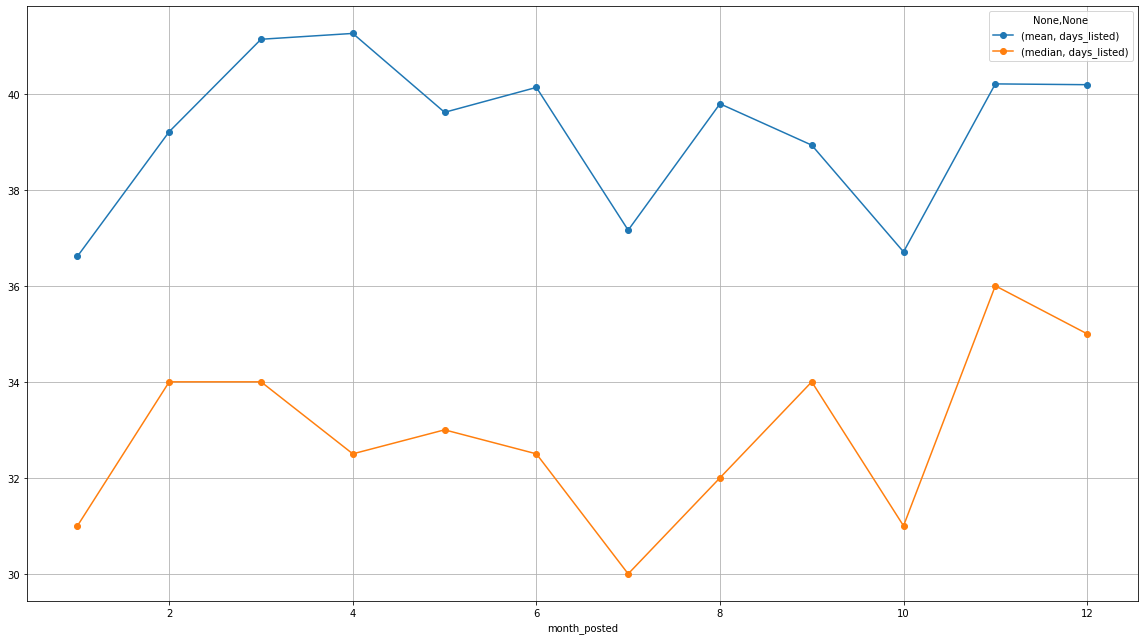

In [53]:
#Agrupamos nuestro conjunto de datos por mes a los días listados, además le agregamos el promedio y la media.
pivot_days = good_cars.pivot_table(index= 'month_posted', values= 'days_listed', aggfunc= ['mean','median'])
pivot_days.plot(style= 'o-', figsize= (16, 9), grid= True)
plt.show()

In [54]:
pivot_days

,mean,median
,days_listed,days_listed
month_posted,,
1,36.614232,31.0
2,39.210317,34.0
3,41.135135,34.0
4,41.256757,32.5
5,39.613559,33.0
6,40.132231,32.5
7,37.159259,30.0
8,39.791209,32.0


**Conclusiones**

Para este estudio hemos tomado como periodos de referencia los meese del año. Agrupamos los días listados por mes y calculamos la media y la mediana. A pesar de haber eliminado los valores atípicos se puede evidenciar una fuerte influencia de valores elevados sobre la media. Por tal motivo hemos seleccionado la midiana para sacar nuestras conclusiones.

- Podemos ver que en noviembre los días enlistados aumentan, esto puede ocurrir deabido a que en Estados Unidos en noviembre es Black Friday, fecha donde las personas destinan sus recursos a la compra de obsequios para navidad.


- Por otro lado observamos una disminución de tiempos de listado en el mes de julio, en verano es una excelente idea comprar un vehiculo. 


- También se detectó un valle en octubre este fenómeno coincide con el cierre del año fiscal, donde algunas empresas entregan parte de sus utilidades a sus colaboradores.

## Precio promedio por cada tipo de vehículo

Realizamos un análisis del precio promdedio por cada tipo de vehículo.

In [55]:
#Agrupamos nuestro conjunto de datos por número de anuncios y promedio de precio por tipo de vehículo.
grouped_type = good_cars.pivot_table(index= 'type', values= 'price', aggfunc= ['count', 'mean'])

In [56]:
#Cambiamos los nombres de las columnas y ordenamos descendetemente por número de anuncios.
grouped_type.columns = ['count', 'mean_price']
grouped_type.sort_values(by= 'count', ascending= False, inplace= True)

In [57]:
#Ya que el tipo de vehículo es el índice lo convertimos en columna.
grouped_type.reset_index(inplace= True)

In [58]:
grouped_type

,type,count,mean_price
0,sedan,679,12360.285714
1,truck,627,25128.838915
2,SUV,588,20037.819728
3,pickup,562,25112.620996
4,coupe,376,24106.901596
5,hatchback,58,12103.413793
6,wagon,54,13693.444444
7,mini-van,38,16783.289474
8,convertible,37,22665.162162
9,other,16,13367.625000


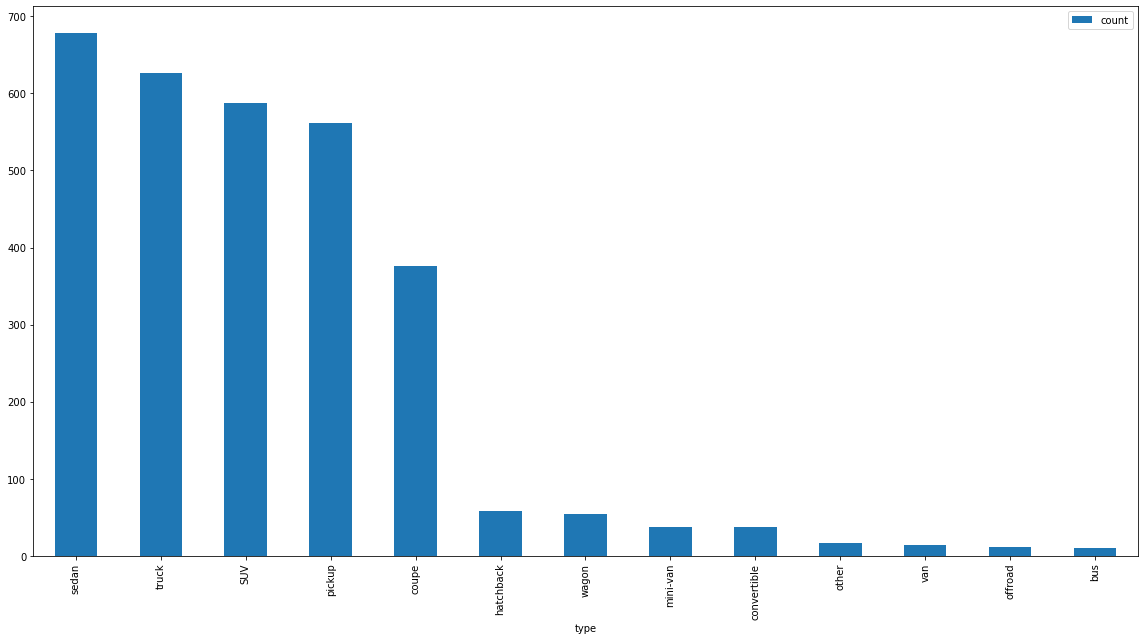

In [59]:
#Realizmos un gráfico de barras para visualizar los mayores tipos de vehículo publicado.
grouped_type.plot(kind='bar', x= 'type', y= 'count', figsize= (16, 9))
plt.show()

**Conclusiones:**

Mediante este estudio podemos observar que los dos tipos de items mas ofertados en el mercado de vehiculos en Estados Unidos son los de tipo sedan y camiones. También podemos definir dos grupos bien marcados en cuanto a cantidad de anuncios por tipos de vehículo.

## Factores de precio

Realizamos un análisis de cuales son los factores que mas impactan al momento de comprar un automóvil, utilizamos los tipos de autos mas vendidos, los cuales son sedan y truck.

In [60]:
#Una función para analizar los tipos de automóviles mas vendidos truck y sedan.
def create_corr(type_car, filter_):
    print(f'*********** Estudio para {type_car} ***********\n')
    #Filtramos el conjunto de datos a partir de la variable 'type_car'
    type_car = good_cars.query('type == @type_car')
    
    #filtramos los tipos de transmission y color mayores que filter_
    filter_type_car_transmission = type_car.pivot_table(index='transmission', values= 'price', aggfunc= 'count' ).query('price > @filter_').index
    filter_type_car_color = type_car.pivot_table(index='paint_color', values= 'price', aggfunc= 'count' ).query('price > @filter_').index
    
    
    #generamos el gráfico de cajas para el conjunto de datos type car filtrado con filter_ para la transmision
    print('Gráfico de cajas Transmission')
    type_car.query('transmission in @filter_type_car_transmission').boxplot(by= 'transmission', column= 'price',figsize= (16, 9))
                                                                            
    plt.show()
    
    #generamos el gráfico de cajas para el conjunto de datos type car filtrado con filter_ para el color
    print('Gráfico de cajas Color')
    type_car.query('paint_color in @filter_type_car_color').boxplot(by= 'paint_color', column= 'price',figsize= (16, 9))
    plt.show()
    
    #generamos el diagrama de correlación
    print('Diagrama de correalción')
    pd.plotting.scatter_matrix(type_car[['price','years','condition','odometer']], figsize= (16, 9))
    plt.show()
    
    #generamos la matriz de correlación
    print('Matriz de correlación')
    print(type_car[['price','years','condition','odometer']].corr())
    print('\n\n')
   
    


*********** Estudio para sedan ***********

Gráfico de cajas Transmission


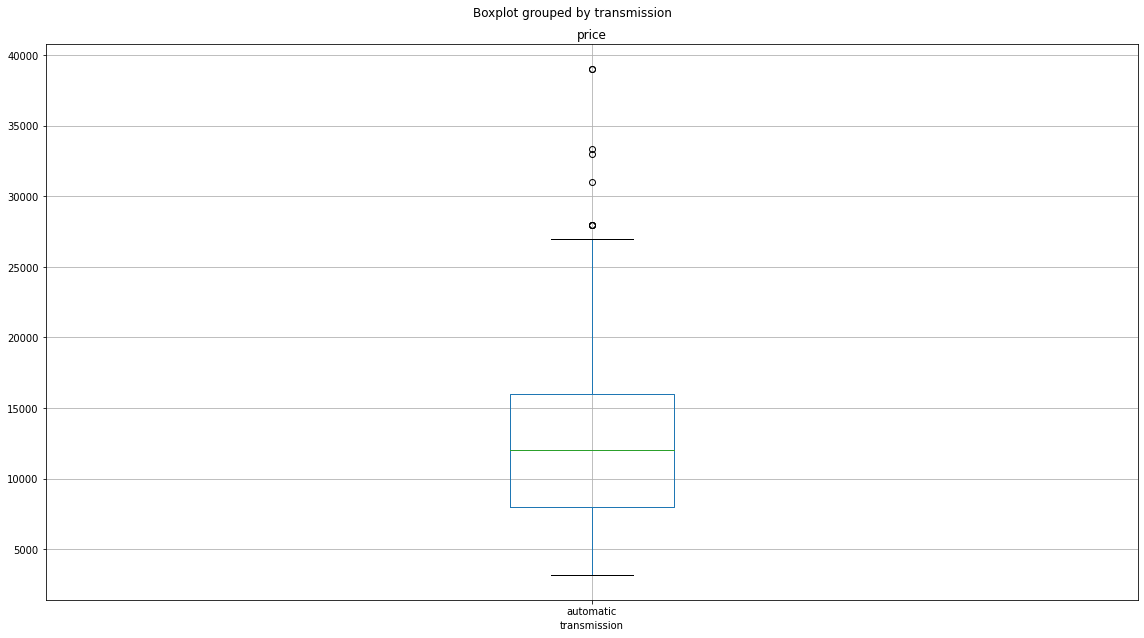

Gráfico de cajas Color


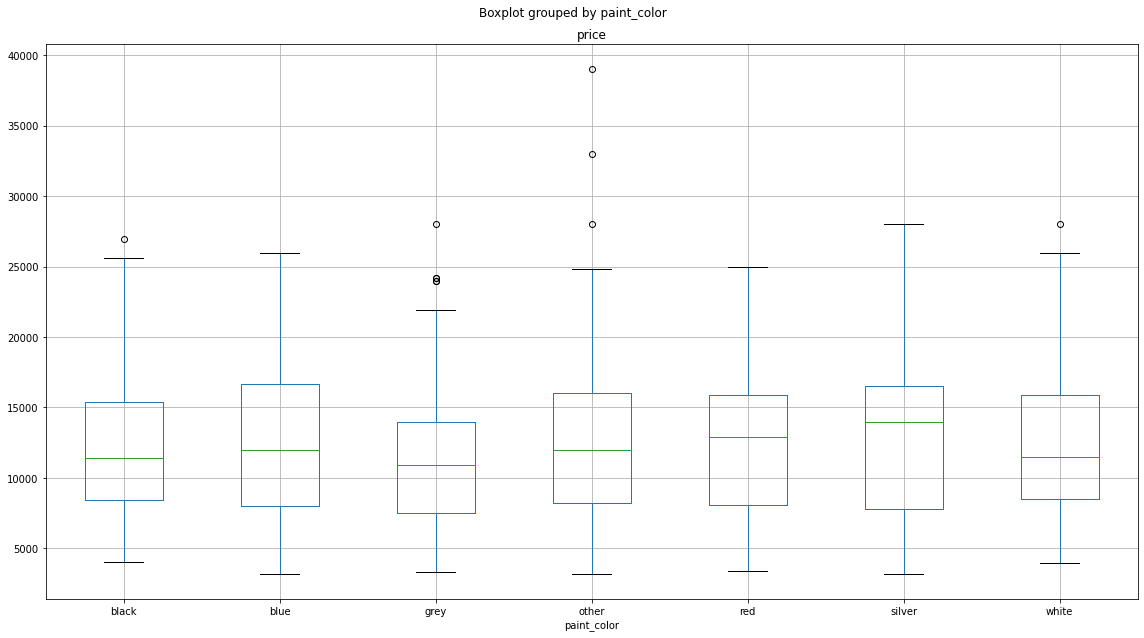

Diagrama de correalción


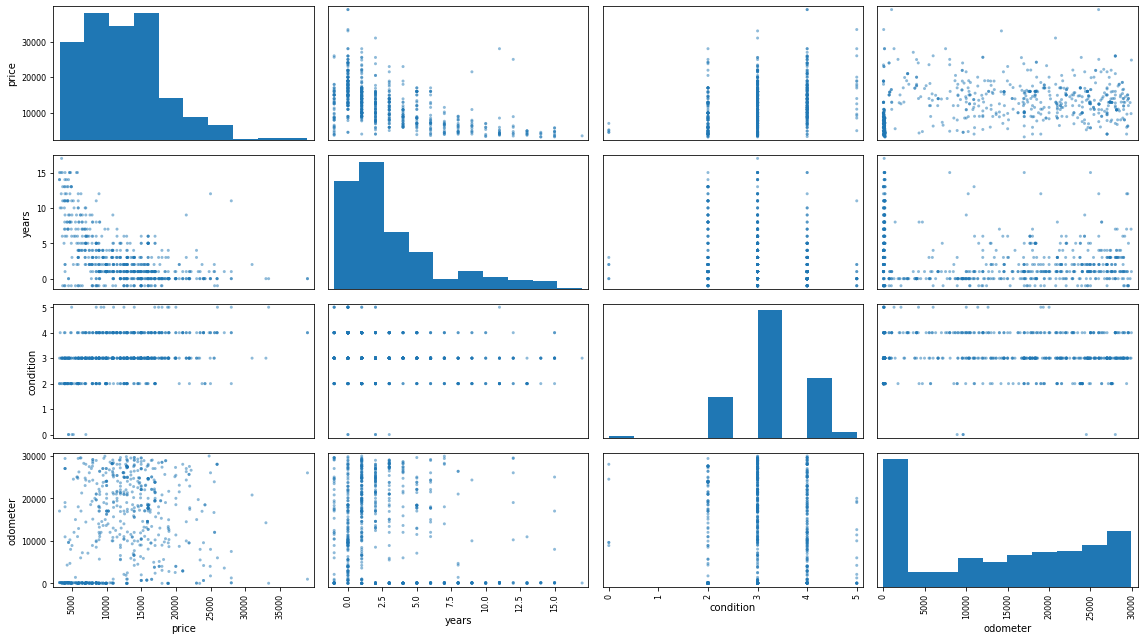

Matriz de correlación
              price     years  condition  odometer
price      1.000000 -0.545663   0.306696  0.284108
years     -0.545663  1.000000  -0.211989 -0.305862
condition  0.306696 -0.211989   1.000000  0.023063
odometer   0.284108 -0.305862   0.023063  1.000000



*********** Estudio para truck ***********

Gráfico de cajas Transmission


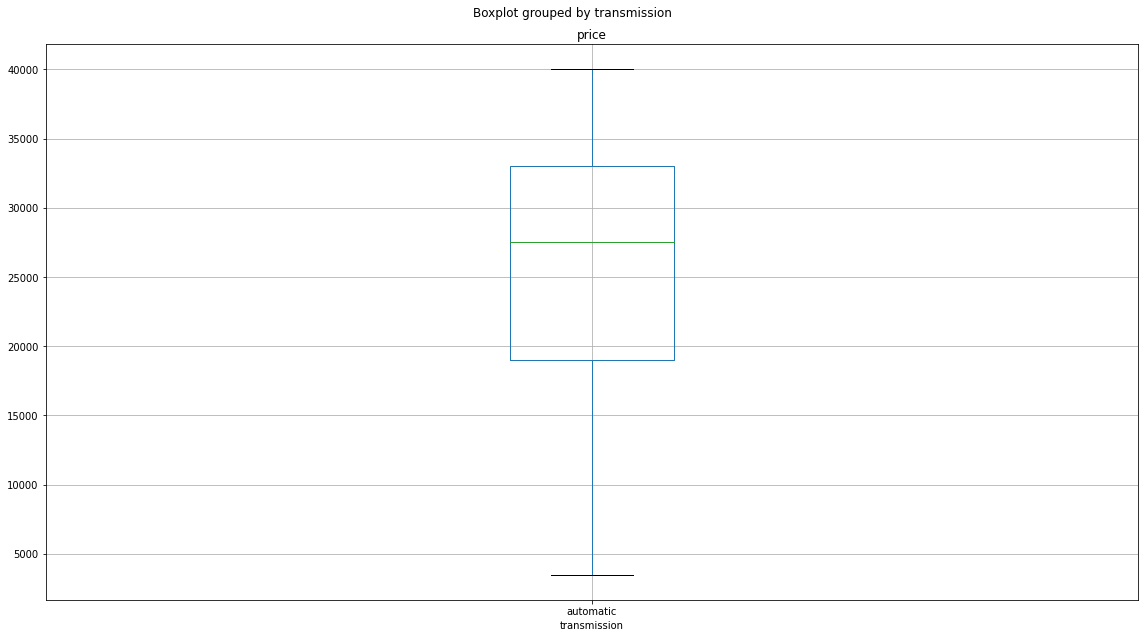

Gráfico de cajas Color


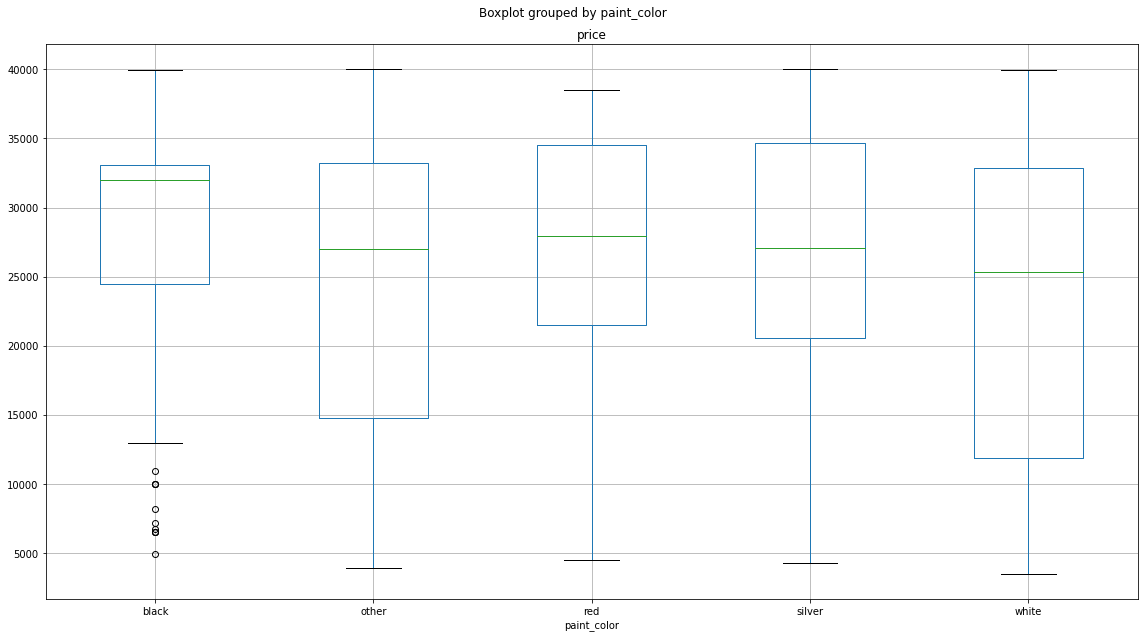

Diagrama de correalción


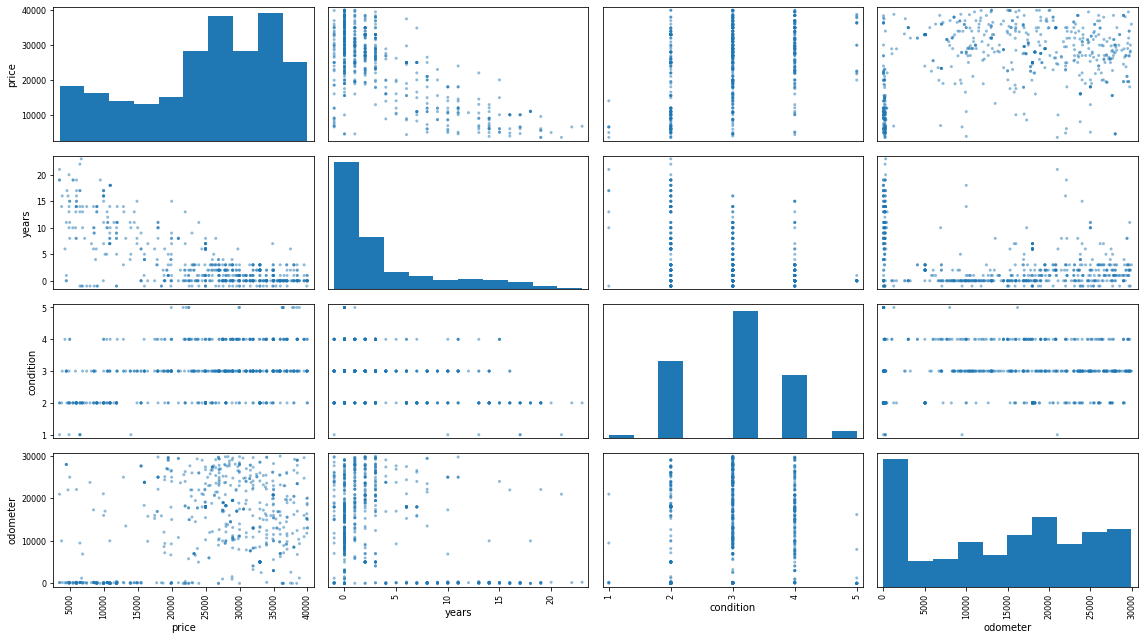

Matriz de correlación
              price     years  condition  odometer
price      1.000000 -0.722984   0.378343  0.421531
years     -0.722984  1.000000  -0.413144 -0.435945
condition  0.378343 -0.413144   1.000000  0.113647
odometer   0.421531 -0.435945   0.113647  1.000000





In [59]:
for row in grouped_type.loc[0:1, 'type']:
    create_corr(row, 50)

**Conclusiones:**

- A partir de este estudio encontramos que los autos con transmisión automática son los mas ofertados, tanto para vhiculos sedan como para camiones.

- También se observó que los vehículos sedan plateados son levemente mas caros que los demás colores. Para los camiones el negro es el color menos económico.

- Para los datos de los vehiculos sedan no se encontró ninguna correlacióin significativa con el precio. Pero para los camiones se detectó una relación lineal inversa del precio con la edad del vehículo. En otras palbras a mayor edad el precio del vehículo disminuye.

## Conclusión general


1.	En cuanto a valores ausentes, encontramos varias incidencias en las columnas: ‘model_year’, ‘cylinders’, ‘odometer’, ‘paint_color’, ‘is_4wd’. Los cuales fuero reemplazdos por valores identificables que nos ayudaron con el análisis, y otros fueron simplemente eliminados.


2.	No encontramos datos duplicados.


3.	 También encontramos tipos de datos inapropiados para las variables: ‘model_year’, ‘price’, ‘cylinders’, ‘is_4dw’, ‘date_posted’. Los cuales fueron cambiados sin problema.


4.	Se encontró valores problemáticos en la variable ‘price’. Donde varios anuncios tenían valores igual a 1. 


5.	Se realizó un análisis exploratorio al conjunto de datos con gráficos de caja e histogramas, donde se identificaron valores atípicos para las variables: ‘price’, ‘years’, ‘odometer’. Y se definieron limites superior e inferior.


6.	Se realizó una comparación de los datos originales y datos filtrados por los limites definidos, para analizar el impacto de los datos atípicos sobre las distribuciones.


7.	Se definieron periodos donde aumenta la venta de autos y periodos donde disminuye la venta de autos, esto en base a la media de cantidad de días del anuncio.


8.	Se detectó los dos tipos de vehículos mas vendidos y en base a esto realizamos un análisis de correlación del precio a alguna característica y se encontró que para los camiones la edad del vehículo tiene una relación lineal inversa con respecto a su precio.
